# Principal Component Analysis
![Mahdieh](./img/passport_photo.jpg)

Creator : *Mahdieh Alizadeh*
 
Email address: Mahdieh20201@gmail.com

Machine Learning 1403-fall



## High Dimension Examples
High dimensions have many features like EEG signals from the brain or social media and etc.

![social](./img/social.png)
## Dimensionality Reduction Benefits
1. Visualization
2. Helps avoid overfitting
3. More efficient use of resources
## Dimensionality Reduction Techniques
1. Feature Selection

    select a subset from a given feature set.
    
2. Feature Extraction

    A linear or non linear transform from the orginal feature space to a lower dimension space.

![social](./img/FS-FE.png)

## Dimensionality Reduction Purpose
Maximize retention of important information while reducing dimensionality.

what is important information?

Information: Variance of projected data

![social](./img/dim_red_var.jpg)

Information: Preserve local geometric nighborhood.

![social](./img/local_relation.png)


Information: Preserve both local and global geometric nighborhood.

![social](./img/global_relation.png)



## Idea:
Given data points in a d-dimensional space, project them into a lower dimensional
space while preserving as much information as possible:

 Find the best planar approximation of 3D data.

 Find the best 12-D approximation of 104-D data.

 In particular, choose projection that minimizes the squared error in reconstructing the original data.

### CODE: 2D Gussian dataset
This Python code generates and visualizes 2D data sampled from a multivariate normal distribution with the following mean and covariance matrix:

**Mean Vector**:
$$
\mu = \begin{bmatrix} 0 \\ 0 \end{bmatrix}
$$

**Covariance Matrix**:
$$
\Sigma = \begin{bmatrix} 1 & 0.8 \\ 0.8 & 1 \end{bmatrix}
$$

It creates a scatter plot of 1,000 samples, showing the correlation between the two variables, with an equal aspect ratio and grid for clarity.



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


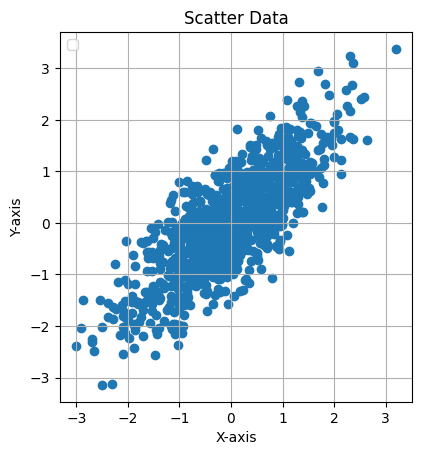

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Define the mean vector and covariance matrix
mean = [0, 0]  # Example: 2D data with zero mean
cov = [[1, 0.8], [0.8, 1]]  # Covariance matrix (2x2)

# Number of samples
n_samples = 1000

# Generate data
data = np.random.multivariate_normal(mean, cov, size=n_samples)

plt.scatter(data[:,0], data[:,1])
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Scatter Data")
plt.gca().set_aspect("equal")  # Equal aspect ratio
plt.legend()
plt.grid(True)
plt.show()



### CODE: First PCA axis
This Python code computes the covariance matrix of the generated data, performs eigen decomposition, and visualizes the first principal axis (the eigenvector with the largest eigenvalue). The plot displays the data points along with the first principal axis, represented by a red arrow, indicating the direction of maximum variance in the data. The axis is scaled for better visualization, and the plot includes grid lines, axis labels, and a legend.


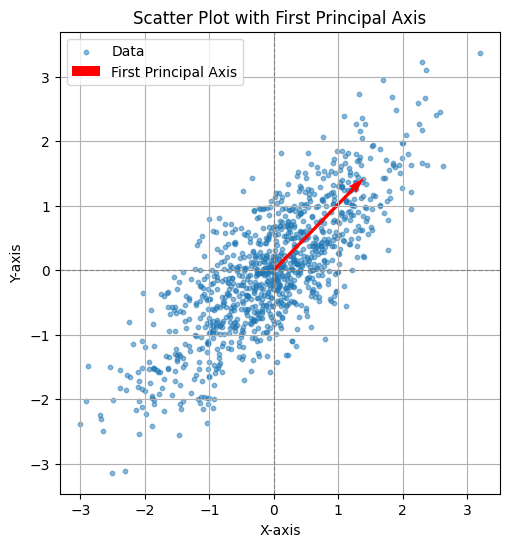

In [15]:
# Compute the covariance matrix of the generated data
data_cov = np.cov(data, rowvar=False)

# Perform eigen decomposition
eigenvalues, eigenvectors = np.linalg.eigh(data_cov)

# Find the first principal axis (eigenvector with the largest eigenvalue)
first_principal_axis = eigenvectors[:, np.argmax(eigenvalues)]

# Scale the axis for visualization
scaling_factor = 2  # Arbitrary scaling factor for better visualization
axis_line = first_principal_axis * scaling_factor

# Plot the data
plt.figure(figsize=(6, 6))
plt.scatter(data[:, 0], data[:, 1], alpha=0.5, s=10, label="Data")
plt.axhline(0, color="gray", linestyle="--", linewidth=0.8)
plt.axvline(0, color="gray", linestyle="--", linewidth=0.8)

# Add the first principal axis
plt.quiver(
    mean[0], mean[1], 
    axis_line[0], axis_line[1],
    angles="xy", scale_units="xy", scale=1, color="red", label="First Principal Axis"
)

# Add labels and title
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Scatter Plot with First Principal Axis")
plt.gca().set_aspect("equal")  # Equal aspect ratio
plt.legend()
plt.grid(True)
plt.show()

### CODE: First and Second Axis
This Python code computes the covariance matrix of the generated data and performs eigen decomposition to extract the first two principal components. The principal components are scaled for better visualization and plotted alongside the data. The first principal component (largest eigenvalue) is shown in red, and the second principal component (smallest eigenvalue) is shown in blue. The plot includes grid lines, axis labels, and a legend, with an equal aspect ratio to clearly visualize the orientation of the principal components in relation to the data.


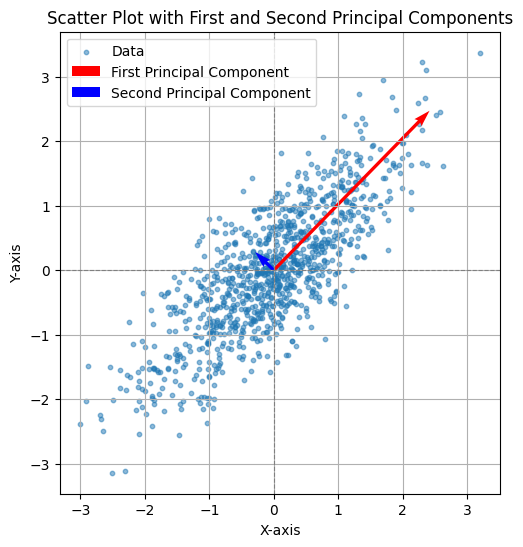

In [16]:
# Compute the covariance matrix of the generated data
data_cov = np.cov(data, rowvar=False)

# Perform eigen decomposition
eigenvalues, eigenvectors = np.linalg.eigh(data_cov)

# Scale the principal components for visualization
scaling_factor = 2  # Arbitrary scaling factor for better visualization
pc1 = eigenvectors[:, 1] * eigenvalues[1] * scaling_factor  # First principal component (largest eigenvalue)
pc2 = eigenvectors[:, 0] * eigenvalues[0] * scaling_factor  # Second principal component (smallest eigenvalue)

# Plot the data
plt.figure(figsize=(6, 6))
plt.scatter(data[:, 0], data[:, 1], alpha=0.5, s=10, label="Data")
plt.axhline(0, color="gray", linestyle="--", linewidth=0.8)
plt.axvline(0, color="gray", linestyle="--", linewidth=0.8)

# Add the first and second principal axes
plt.quiver(mean[0], mean[1], pc1[0], pc1[1], angles="xy", scale_units="xy", scale=1, color="red", label="First Principal Component")
plt.quiver(mean[0], mean[1], pc2[0], pc2[1], angles="xy", scale_units="xy", scale=1, color="blue", label="Second Principal Component")

# Add labels and title
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Scatter Plot with First and Second Principal Components")
plt.gca().set_aspect("equal")  # Equal aspect ratio
plt.legend()
plt.grid(True)
plt.show()

Random direction versus principal component:
 
 ![PCAdata](./img/pcaVSrandom.JPG)

## Definition

1. Goal: reducing the dimenionality of the data while preserving important aspects of the data.


   Suppose $ \mathbf{X} $:

  $$
  \mathbf{X} =
  \begin{pmatrix}
      \mathbf{X}_1^\top \\
      \vdots \\
      \mathbf{X}_N^\top
  \end{pmatrix}_{N \times d}
  =
  \begin{pmatrix}
      x_{11} & x_{12} & \cdots & x_{1d} \\
      x_{21} & x_{22} & \cdots & x_{2d} \\
      \vdots & \vdots & \ddots & \vdots \\
      x_{N1} & x_{N2} & \cdots & x_{Nd}
  \end{pmatrix}
  $$

- $ \mathbf{X}_{N \times d} \xrightarrow{\text{PCA}} \tilde{\mathbf{X}}_{N \times k} \quad \text{with} \quad k \leq d $

- **Assumption**: Data is mean-centered, which is:
  
  $$
  \mu_x = \frac{1}{N} \sum_{i=1}^N \mathbf{X}_i = \mathbf{0}_{d \times 1}
  $$
## Interpretations
Orthogonal projection of the data onto a lower-dimensional linear subspace that:
Interpretation 1. Maximizes variance of projected data.
Interpretation 2. Minimizes the sum of squared distances to the subspace.

![PCAdata](./img/pca.png)
### Equivalence of the Interpretations
Minimizing the sum of square distances to the subspace is equivalent to
maximizing the sum of squares of the projections on that subspace

![PCAdata](./img/var_vs_rec.JPG)



A set of orthonormal vectors $ \mathbf{v} =  \mathbf{v}_1, \mathbf{v}_2, \dots, \mathbf{v}_k $ (where each $ \mathbf{v}_i $ is $ d \times 1 $ ) generated by PCA, which fulfill both of the interpretations.


#### Maximizes variance of projected data


Projection of data points on  $\mathbf{v}_1$:

$$\Pi = \Pi_{\mathbf{v}_1}\{ \mathbf{X}_1, \dots, \mathbf{X}_N \} = \{ \mathbf{v}_1^\top \mathbf{X}_1, \dots, \mathbf{v}_1^\top \mathbf{X}_N \} $$

Note that: $Var(\mathbf{X}) = \mathbb{E}[\mathbf{X}^2] - \mathbb{E}[\mathbf{X}]^2$ 

$$\mathbb{E}[\mathbf{X}] = 0 \implies Var(\Pi) = \frac{1}{N}  \sum_{i=1}^N (\mathbf{v}_1^\top \mathbf{X}_i)^2 $$


- Mean Centering data
    - Zeroing out the mean of each feature
- Scaling to normalize each feature to have variance 1 (an arbitrary step)
    - Might affect results
    - It helps when unit of measurements of features are different and some features may be ignored without normalization.

## Background
Before starting PCA algorithm, we sjould be familiar with followings:
1. what are eigenvalues and eigenvectors?
2. Sample covariance matrix

###  what are Eigenvalues and eigenvectors?
Eigenvector: A non-zero vector that multiplies only by a scalar factor when a linear transformation is applied.
Eigenvalue: The scalar factor by which the eigenvector is scaled.
Equation for a n×n matrix:

$$
Av = \lambda v
$$

Where:

A: a Square Matrix

v: Eigenvector

$ \lambda $: Eigenvalue
### Geometrical Interpretation
Eigenvectors point in the same direction (or opposite) after the transformation.
 Eigenvectors do not change direction under a transformation.
 Eigenvalues represent howmuch the vector is stretched or compressed.
 Eigenvalues tell us how much the vector is scaled.

 

 
![PCAdata](./img/eigenvetor-eigenvalue-idea.png)

### How to Find Eigenvalues and Eigenvectors?
we know that
$$
Av = \lambda v
$$
so
$$
Av - \lambda v=0
$$
$$
(Av - \lambda I) v=0
$$
v can not be zero, so:
$$
det(Av - \lambda I)=0
$$
solve for  $\lambda $
substitude $ \lambda $ back into the equation $ Av=\lambda v $ to find v.
#### Numerical Example
Assume 
$
A = \begin{pmatrix}
4 & -5 \\ 
2 & -3 
\end{pmatrix}
$

then 

$ A-\lambda I= \begin{pmatrix}
4-\lambda & -5 \\ 
2 & -3-\lambda 
\end{pmatrix} 
$
$$

Determinant (A- \lambda I)= (4-\lambda)(-3-\lambda)+10=(\lambda)^2-\lambda-2=0

$$

$$
\lambda=-1   or  \lambda=2
$$

$$
for \lambda_1=-1: 

(A- \lambda_1 I)v_1= \begin{pmatrix} 5 & -5 \\ 2 & -2 \end{pmatrix} \begin{pmatrix} v_{11} \\ v_{12} \end{pmatrix} = \begin{pmatrix} 0 \\0  \end{pmatrix} \implies v_1=\begin{pmatrix} 1 \\1  \end{pmatrix}
$$

$$
for \lambda_2=2: 

(A- \lambda_2 I)v_2= \begin{pmatrix} 2 & -5 \\ 2 & -5 \end{pmatrix} \begin{pmatrix} v_{21} \\ v_{22} \end{pmatrix} = \begin{pmatrix} 0 \\0  \end{pmatrix} \implies v_2=\begin{pmatrix} 5 \\2  \end{pmatrix}
$$

#### visualization
![PCAdata](./img/matrix_transformations.png)

### what is Covariance?
Covariance is a measure of how much two random features vary together.
    $$Cov(X,Y) = E[(X −E[X])(Y −E[Y])] = E[(Y −E[Y])(X −E[X])] = Cov(Y,X)$$
 So covariance is symmetric.
 Such as heights and weights of individuals.
 #### what is covariance Matrix?
 A covariance matrix generalizes the concept of covariance to multiple features.
 suppose there is two feature covariance matrix:
 
$$
\Sigma = \begin{pmatrix}
a & b \\ 
c & d 
\end{pmatrix} =\begin{pmatrix}
a & b \\ 
b & d 
\end{pmatrix}
$$

why b=c?

what is the relation between a,b and d?

##### Covariance Matrix Example 
$$ \Sigma = \begin{pmatrix}
a & 0 \\ 
0 & a 
\end{pmatrix}
$$

#### CODE: Example
This Python code generates and visualizes 2D data sampled from a multivariate normal distribution with a mean of [0, 0] and a covariance matrix of:

$$
\Sigma = \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix}
$$

The covariance matrix represents independent variables with no correlation. The code creates a scatter plot of 1,000 samples, with equal scaling for both axes and grid lines to better display the distribution of the data, which should appear circular due to the lack of correlation between the variables.


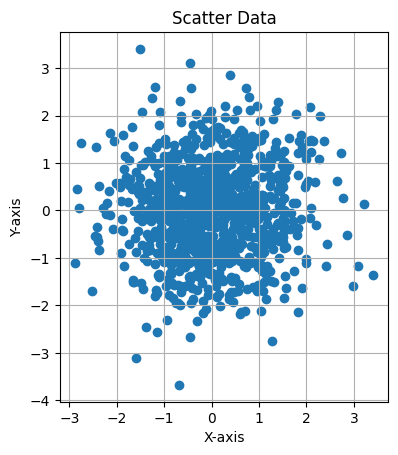

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Define the mean vector and covariance matrix
mean = [0, 0]  # Example: 2D data with zero mean
cov = [[1, 0], 
       [0, 1]]  # Covariance matrix (2x2)

# Number of samples
n_samples = 1000

# Generate data
data = np.random.multivariate_normal(mean, cov, size=n_samples)

plt.scatter(data[:,0], data[:,1])
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Scatter Data")
plt.gca().set_aspect("equal")  # Equal aspect ratio
plt.grid(True)
plt.show()


$$  \Sigma = \begin{pmatrix}
a & 0 \\ 
0 & d 
\end{pmatrix}
$$


#### CODE: Example
This Python code generates and visualizes 2D data sampled from a multivariate normal distribution with a mean of [0, 0] and a covariance matrix of:

$$
\Sigma = \begin{bmatrix} 4 & 0 \\ 0 & 1 \end{bmatrix}
$$

The covariance matrix indicates that the variables have different variances (4 and 1) but no correlation. The scatter plot of 1,000 samples will show an elliptical distribution, with a larger spread along the X-axis due to the larger variance of 4 in that direction. The plot includes an equal aspect ratio and grid lines for better visualization.


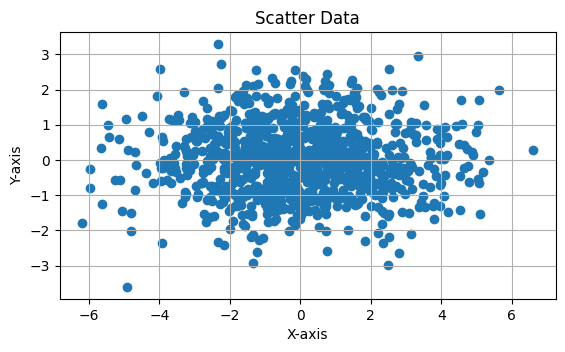

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Define the mean vector and covariance matrix
mean = [0, 0]  # Example: 2D data with zero mean
cov = [[4, 0], 
       [0, 1]]  # Covariance matrix (2x2)

# Number of samples
n_samples = 1000

# Generate data
data = np.random.multivariate_normal(mean, cov, size=n_samples)

plt.scatter(data[:,0], data[:,1])
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Scatter Data")
plt.gca().set_aspect("equal")  # Equal aspect ratio
plt.grid(True)
plt.show()


$$  \Sigma = \begin{pmatrix}
a & b \\ 
b & d 
\end{pmatrix}
$$

a>d and b>0

#### CODE: Example
This Python code generates and visualizes 2D data sampled from a multivariate normal distribution with a mean of [0, 0] and a covariance matrix of:
$$
\Sigma = \begin{bmatrix} 10 & 4 \\ 4 & 2 \end{bmatrix}
$$

The covariance matrix indicates that the variables have different variances (10 and 2) and a positive correlation of 4. The scatter plot of 1,000 samples will show an elliptical distribution, with the data points being spread more along the X-axis due to the larger variance (10) and a skewed shape due to the positive correlation between the variables. The plot includes an equal aspect ratio and grid lines for better visualization.


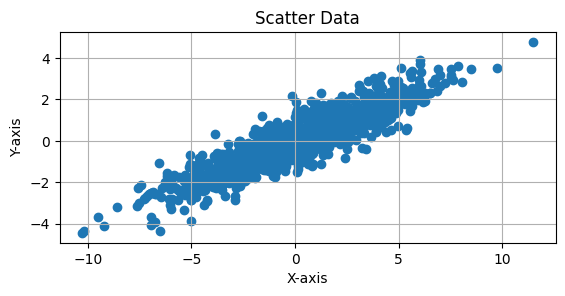

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Define the mean vector and covariance matrix
mean = [0, 0]  # Example: 2D data with zero mean
cov = [[10, 4], 
       [4, 2]]  # Covariance matrix (2x2)

# Number of samples
n_samples = 1000

# Generate data
data = np.random.multivariate_normal(mean, cov, size=n_samples)

plt.scatter(data[:,0], data[:,1])
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Scatter Data")
plt.gca().set_aspect("equal")  # Equal aspect ratio
plt.grid(True)
plt.show()

$$  \Sigma = \begin{pmatrix}
a & b \\ 
b & d 
\end{pmatrix}
$$

a>d and b<0

#### CODE:Example
This Python code generates and visualizes 2D data sampled from a multivariate normal distribution with a mean of [0, 0] and a covariance matrix of:

$$
\Sigma = \begin{bmatrix} 10 & -4 \\ -4 & 2 \end{bmatrix}
$$

The covariance matrix indicates that the variables have different variances (10 and 2) and a negative correlation of -4. The scatter plot of 1,000 samples will show an elliptical distribution, with the data points spread more along the X-axis due to the larger variance (10) and a skewed shape due to the negative correlation between the variables. The plot includes an equal aspect ratio and grid lines for better visualization.


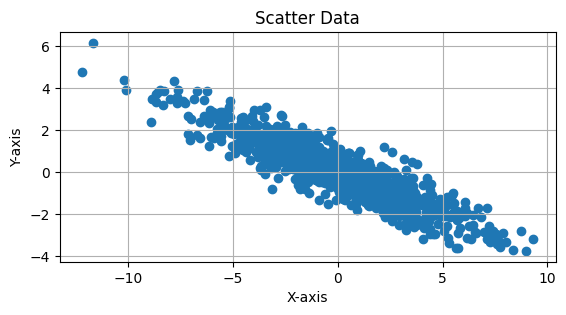

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Define the mean vector and covariance matrix
mean = [0, 0]  # Example: 2D data with zero mean
cov = [[10, -4], 
       [-4, 2]]  # Covariance matrix (2x2)

# Number of samples
n_samples = 1000

# Generate data
data = np.random.multivariate_normal(mean, cov, size=n_samples)

plt.scatter(data[:,0], data[:,1])
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Scatter Data")
plt.gca().set_aspect("equal")  # Equal aspect ratio
plt.grid(True)
plt.show()

## Expression for variance

- The variance of the projected data onto the direction $v$ is:
$$
\text{VAR}(X\mathbf{v}) = \frac{1}{n} \sum_{i=1}^n (x_i^T\mathbf{v})^2
$$
-this can be written as:
$$
\text{VAR}(X\mathbf{v}) = \frac{1}{n} ||X\mathbf{v}||^2 = \frac{1}{n} \mathbf{v}^TX^TX\mathbf{v} = \mathbf{v}^T \Sigma \mathbf{v}
$$

## Maximization Problem
- We aim to maximize the variance $\mathbf{v}^T\Sigma \mathbf{v}$ under the constraint that $ ||\mathbf{v}||=1 $.
- This leads to the following optimization problem:
$$ \max_{v} \mathbf{v}^T \Sigma \mathbf{v} \text{ subject to } ||\mathbf{v}||=1 $$

## Use of Lagrange Multipliers
- We introduce a Lagrange multiplier $\lambda$ and define the Lagrangian:
$$ L(\mathbf{v},\lambda)=\mathbf{v}^T \Sigma \mathbf{v} - \lambda (\mathbf{v}^T\mathbf{v} - 1) $$

- Taking the derivative with respect to $\mathbf{v}$ and setting it to 0:
$$ \frac{\partial{L}}{\partial{\mathbf{v}}} = 2\Sigma \mathbf{v} - 2 \lambda \mathbf{v} = 0 $$
- This simplifies to:
$$
\Sigma \mathbf{v} = \lambda \mathbf{v}
$$
- We define all $(\mathbf{v}_1, \lambda_1), (\mathbf{v}_2, \lambda_2), ... ,(\mathbf{v}_k, \lambda_k)$ as the $k$ eigenvectors of $\Sigma$ having largest eigenvalues: $\lambda_1 \geq \lambda_2 \geq ... \geq \lambda_k$

## Interpretation
- The variance $\mathbf{v}^T \Sigma \mathbf{v}$ is maximized when $\mathbf{v}$ is the eigenvector corresponding to the largest eigenvalue of $\Sigma$.
- The eigenvalue $\lambda$ represents the variance in the direction of the eigenvector $\mathbf{v}$.
- Conclusion: Eigenvectors of the covariance matrix maximize the variance of the projected data.

## CODE:
This Python code performs Principal Component Analysis (PCA) on the MNIST-like digit dataset from `sklearn.datasets`. The dataset is first loaded and reshaped, with pixel values normalized. The `pca` function calculates the principal components by centering the data (subtracting the mean), computing the covariance matrix, and obtaining its eigenvectors and eigenvalues. The top `num_components` eigenvectors are selected to project the data into a reduced space. The code reduces the dataset to 20 principal components and visualizes the first two principal components in a scatter plot, color-coded by digit labels. This visualization helps to observe how the data is distributed in the reduced-dimensional space.


(1797, 64)
(64, 64)
(1797, 20)


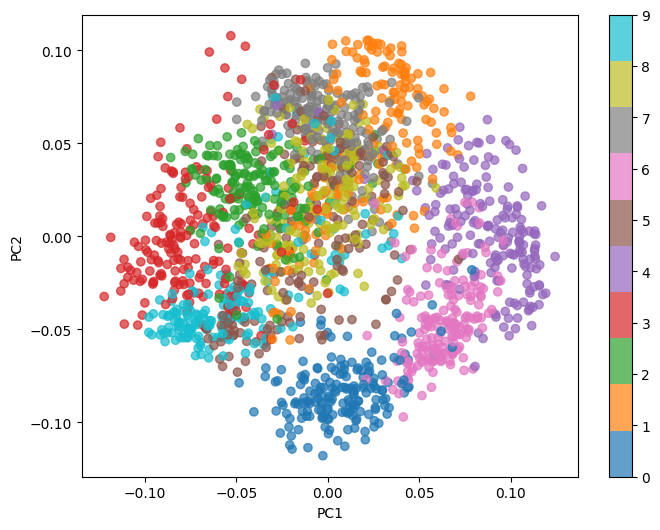

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

data = load_digits()
mnist = data.images
labels = data.target

mnist = mnist.reshape(-1, 64)

mnist = mnist.astype('float32') / 255.0
labels = labels.astype(int)
num_pcs = 20

def pca(X, num_components):
    X_meaned = X - np.mean(X, axis=0)
    covariance_matrix = np.cov(X_meaned, rowvar=False)
    print(X.shape)
    print(covariance_matrix.shape)
    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)
    sorted_index = np.argsort(eigenvalues)[::-1]
    sorted_eigenvectors = eigenvectors[:, sorted_index]
    eigenvector_subset = sorted_eigenvectors[:, :num_components]
    X_reduced = np.dot(X_meaned, eigenvector_subset)
    return X_reduced, eigenvector_subset

mnist_reduced, eigenvector_subset = pca(mnist, num_pcs)
print(mnist_reduced.shape)
plt.figure(figsize=(8, 6))
scatter = plt.scatter(mnist_reduced[:, 0], mnist_reduced[:, 1], c=labels, cmap='tab10', alpha=0.7)
plt.colorbar(scatter)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

## CODE:
This Python code decomposes the reduced MNIST dataset using the inverse of the PCA transformation. The `mnist_decompressed` is reconstructed by multiplying the reduced data (`mnist_reduced`) with the transpose of the eigenvectors (`eigenvector_subset.T`) and adding the mean of the original dataset. The `visualize_decompression` function displays the original and decompressed images side by side for comparison. It reshapes both the original and decompressed data into image format and shows the first 5 images along with their decompressed versions, providing a visual representation of how well the PCA compression and decompression process retains image details.


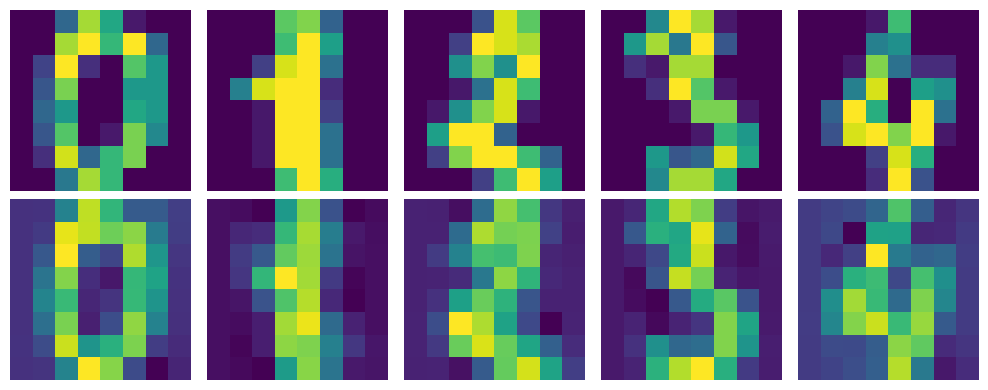

In [22]:
mnist_decompressed = np.dot(mnist_reduced, eigenvector_subset.T) + np.mean(mnist, axis=0)

def visualize_decompression(original, decompressed, img_shape, num_images=5, title=""):
    original = original.reshape(-1, *img_shape)
    decompressed = decompressed.reshape(-1, *img_shape)

    plt.figure(figsize=(10, 4))

    for i in range(num_images):
        plt.subplot(2, num_images, i + 1)
        plt.imshow(original[i])
        plt.axis('off')

        plt.subplot(2, num_images, num_images + i + 1)
        plt.imshow(decompressed[i])
        plt.axis('off')

    plt.tight_layout()
    plt.show()


visualize_decompression(mnist[:5], mnist_decompressed[:5], img_shape=(8, 8), title="MNIST")

## CODE:

This project uses PCA to analyze a dataset created from grayscale images of all students in a class. The dataset, stored in `lfw_people`, is constructed by loading pictures from a directory. Additionally, a separate test image is loaded for evaluation.

The goal is to reduce the dimensionality of the images using PCA while retaining the most significant features. The `pca` function extracts the top 10 principal components. The first principal component, visualized as an image, represents the dominant shared feature across the class photos.

The script then compresses and reconstructs both the class dataset and the test image. The `visualize_decompression` function displays the original and reconstructed images side by side, highlighting how well PCA retains critical information.

This analysis demonstrates how PCA can simplify image data, showing class photo decompression and reconstruction effectively while maintaining visual similarity.

(1, 64, 64)
(35, 64, 64)
(35, 4096)
(4096, 4096)


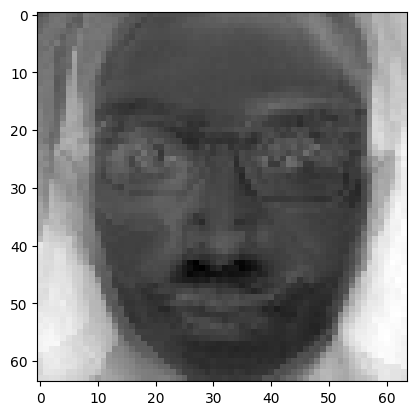

(4096, 10)


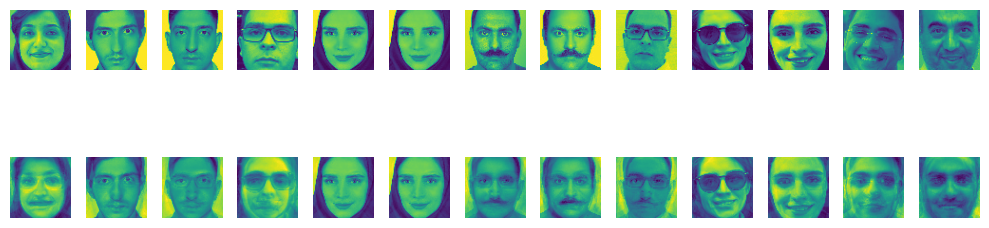

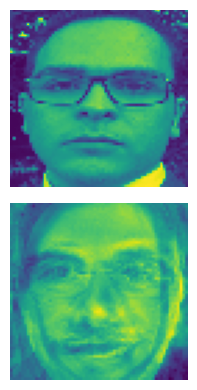

In [3]:
from sklearn.datasets import fetch_olivetti_faces
from matplotlib import pyplot as plt
import numpy as np
import cv2
import os

src = 'D:/education-MS/ML/forth home work/data/'
files = os.listdir(src)
lfw_people = []
for file in files:
    lfw_people.append(cv2.imread(src+file, 0))
lfw_people = np.array(lfw_people)

name = ['resized_parvaz.png','resized_mahdieh.jpg']
test = cv2.imread('D:/education-MS/ML/forth home work/img/'+name[0], 0).reshape(1, 64, 64)

print(test.shape)
print(lfw_people.shape)

num_pcs = 10
def pca(X, num_components):
    X_meaned = X - np.mean(X, axis=0)
    covariance_matrix = np.cov(X_meaned, rowvar=False)
    print(X.shape)
    print(covariance_matrix.shape)
    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)
    sorted_index = np.argsort(eigenvalues)[::-1]
    sorted_eigenvectors = eigenvectors[:, sorted_index]
    eigenvector_subset = sorted_eigenvectors[:, :num_components]
    X_reduced = np.dot(X_meaned, eigenvector_subset)
    return X_reduced, eigenvector_subset

# TRAINING
mnist_reduced, eigenvector_subset = pca(lfw_people.reshape(-1, 64*64), num_pcs)
plt.imshow(eigenvector_subset[:,0].reshape(64, 64), cmap='gray')
plt.show()
# TESTING
test_reduced = np.dot(test.reshape(-1, 64*64), eigenvector_subset)
print(eigenvector_subset.shape)
# plt.figure(figsize=(8, 6))
# scatter = plt.scatter(mnist_reduced[:, 0], mnist_reduced[:, 1], c=labels, cmap='tab10', alpha=0.7)
# plt.colorbar(scatter)
# plt.xlabel('PC1')
# plt.ylabel('PC2')
# plt.show()

mnist_decompressed = np.dot(mnist_reduced, eigenvector_subset.T) + np.mean(lfw_people.reshape(-1, 64*64), axis=0)
test_decompressed = np.dot(test_reduced, eigenvector_subset.T)

def visualize_decompression(original, decompressed, img_shape, num_images=13, title=""):
    original = original.reshape(-1, *img_shape)
    decompressed = decompressed.reshape(-1, *img_shape)

    plt.figure(figsize=(10, 4))

    for i in range(num_images):
        plt.subplot(2, num_images, i + 1)
        plt.imshow(original[i])
        plt.axis('off')

        plt.subplot(2, num_images, num_images + i + 1)
        plt.imshow(decompressed[i])
        plt.axis('off')

    plt.tight_layout()
    plt.show()


visualize_decompression(lfw_people, mnist_decompressed, (64, 64), title="PCA Decompression")
visualize_decompression(test, test_decompressed, (64, 64), num_images=1, title="PCA Decompression")

# Refrences:
[1] M. Soleymani Baghshah, “Machine learning.” Lecture slides.

[2] B. Póczos, “Advanced introduction to machine learning.” Lecture slides.
CMU-10715.

[3] M. Gormley, “Introduction to machine learning.” Lecture slides.
10-701.

[4] M. Gormley, “Introduction to machine learning.” Lecture slides.
10-301/10-601.

[5] F. Seyyedsalehi, “Machine learning and theory of machine learning.” Lecture slides.
CE-477/CS-828.

[6] G. Strang, “Linear algebra and its applications,” 2000.